# WebScraping des Best-Sellers (livres) en France

Importation des librairies.

In [0]:
!pip install bs4
!pip install wordcloud

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Création d'une fonction d'initialisation de la page.

In [0]:
def scrap(page): 
    url = f'https://www.amazon.fr/gp/bestsellers/books/ref=zg_bs_pg_2?ie=UTF8&pg={page}' # On ajoute la variable page pour scraper chaque page avec une boucle
    r = requests.get(url)
    soup = bs(r.content, 'html.parser')
    return soup

In [0]:
page_1 = scrap(1) # On va scraper d'abord la première page et la stocker dans une variable

In [0]:
page_1 # On vérifie que cela a bien été réalisé

Out[185]: <!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="fr-fr"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:aui-assets -->
<link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41VgDLvAiPL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL.css,11gneA3MtJL.css,21f

Création d'une fonction temporaire de test la classe correspondant au bloc html contenant toutes les informations qui nous intéressent.

Etant donné qu'on sait que pour chaque page on a 50 livres on vérifie bien qu'on nous retourne 50 éléments.

In [0]:
def transform(soup):
    divs = soup.find_all('li', class_ = "zg-item-immersion") 
    return len(divs) 

Cela permet de vérifier que la bonne page a été chargée, parfois Amazon peut soupçonner un bot et afficher un captcha au lieu de la page des meilleures ventes.

In [0]:
print(transform(page_1)) 

50


In [0]:
def transform(soup):
    divs = soup.find_all('div', class_ = "a-section a-spacing-none aok-relative")
    
    for item in divs:
        
        try:
            rank_livre = item.find('span', class_ = 'zg-badge-text').text.strip()
        except:
            rank_livre = item.append("NA")
        
        try:
            titre_livre = item.find('div', class_ = 'p13n-sc-truncate p13n-sc-line-clamp-1').text.strip()
        except:
            titre_livre = item.append("NA")
        
        try:
            auteur = item.find('div', class_ = 'a-row a-size-small').text.strip()
        except:
            auteur = item.append("NA")
        
        try:
            note = item.find('span', class_ = 'a-icon-alt').text.strip()
        except:
            note = item.append("NA")
        
        try:
            nombre_votes = item.find('a', class_ = 'a-size-small a-link-normal').text.strip()
        except:
            nombres_votes = item.append("NA")
            
        type_livre = item.find('span', class_ = 'a-size-small a-color-secondary').text.strip()
        
        try:
            prix = item.find('span', class_ = 'p13n-sc-price').text.strip()
        except:
            prix = item.append("NA")
        
       
        print(rank_livre)
        print(titre_livre)
        print(auteur)
        print(note)
        print(nombre_votes)
        print(type_livre)
        print(prix, '\n')

        
        amazon = {
    'rank_livre' : rank_livre,
    'titre_livre' : titre_livre,
    'auteur' : auteur,
    'note' : note,
    'nombre_votes' : nombre_votes,
    'type_livre' : type_livre,
    'prix' : prix
    }
        
        amazonlist.append(amazon)
        
    return

amazonlist = []

page_1 = scrap(1)
transform(page_1)
page_2 = scrap(2)
transform(page_2)


#1
Astérix - Astérix et le Griffon - n°39
René Goscinny
4,5 étoiles sur 5
1 375
Relié
9,99 € 

#2
One Piece - Édition originale - Tome 100
Eiichiro Oda
4,8 étoiles sur 5
135
Poche
6,90 € 

#3
Le Monde sans fin, miracle énergétique et dérive climatique
Blain Christophe
4,8 étoiles sur 5
118
Broché
27,00 € 

#4
La Clé de votre énergie: 22 protocoles pour vous libérer émotionnellement
Natacha Calestreme
4,6 étoiles sur 5
2 731
Broché
19,90 € 

#5
Organiseur familial Mémoniak 2021-2022
Editions 365
4,6 étoiles sur 5
586
Broché
14,90 € 

#6
Goldorak
Dorison Xavier
4,7 étoiles sur 5
631
Relié
24,90 € 

#7
Parce que tu es un garçon formidable: Des histoires inspirantes sur le courage, la force intérieure et la confiance en soi
Sofia Beauvais
4,5 étoiles sur 5
144
Broché
11,95 € 

#8
La plus secrète mémoire des hommes - Prix Goncourt 2021
Mohamed Mbougar Sarr
4,2 étoiles sur 5
487
Broché
22,00 € 

#9
Les cinq blessures qui empêchent d'être soi-même
Lise Bourbeau
4,5 étoiles sur 5
7 376
Poche
7

In [0]:
print(amazonlist)

[{'rank_livre': '#1', 'titre_livre': 'Astérix - Astérix et le Griffon - n°39', 'auteur': 'René Goscinny', 'note': '4,5 étoiles sur 5', 'nombre_votes': '1\u202f375', 'type_livre': 'Relié', 'prix': '9,99\xa0€'}, {'rank_livre': '#2', 'titre_livre': 'One Piece - Édition originale - Tome 100', 'auteur': 'Eiichiro Oda', 'note': '4,8 étoiles sur 5', 'nombre_votes': '135', 'type_livre': 'Poche', 'prix': '6,90\xa0€'}, {'rank_livre': '#3', 'titre_livre': 'Le Monde sans fin, miracle énergétique et dérive climatique', 'auteur': 'Blain Christophe', 'note': '4,8 étoiles sur 5', 'nombre_votes': '118', 'type_livre': 'Broché', 'prix': '27,00\xa0€'}, {'rank_livre': '#4', 'titre_livre': 'La Clé de votre énergie: 22 protocoles pour vous libérer émotionnellement', 'auteur': 'Natacha Calestreme', 'note': '4,6 étoiles sur 5', 'nombre_votes': '2\u202f731', 'type_livre': 'Broché', 'prix': '19,90\xa0€'}, {'rank_livre': '#5', 'titre_livre': 'Organiseur familial Mémoniak 2021-2022', 'auteur': 'Editions 365', 'not

/!\ à noter qu'il est important de vérifier que les print pour la boucle ci-dessous vont bien de 1 à 100 et non de 50 à 100 ou de 1 à 50. Cela voudrait dire qu'Amazon a détecté une anomalie lors du scraping de la page 1 ou 2 voire les deux et nous n'obtiendront donc pas une base complète.

In [0]:
amazonlist = [] # C'est ici qu'on va stocker toutes les informations des pages
for page in range (1,3,1): # On considère seulement les 2 premières pages
    print(f'Extraction de la page: {page}') # On met un print pour vérifier que la boucle fonctionne bien
    c = scrap(page) # On initialise à chaque fois la nouvelle page
    transform(c) # Et on effectue le scrapping

df = pd.DataFrame(amazonlist) # On crée un dataframe à partir de la liste qu'on a remplie
df.to_csv('amazon_data.csv', index=False, encoding = "UTF-8") # Et on l'exporte sous format CSV


Extraction de la page: 1
#1
Astérix - Astérix et le Griffon - n°39
René Goscinny
4,5 étoiles sur 5
1 375
Relié
9,99 € 

#2
One Piece - Édition originale - Tome 100
Eiichiro Oda
4,8 étoiles sur 5
135
Poche
6,90 € 

#3
Le Monde sans fin, miracle énergétique et dérive climatique
Blain Christophe
4,8 étoiles sur 5
118
Broché
27,00 € 

#4
La Clé de votre énergie: 22 protocoles pour vous libérer émotionnellement
Natacha Calestreme
4,6 étoiles sur 5
2 731
Broché
19,90 € 

#5
Organiseur familial Mémoniak 2021-2022
Editions 365
4,6 étoiles sur 5
586
Broché
14,90 € 

#6
Goldorak
Dorison Xavier
4,7 étoiles sur 5
631
Relié
24,90 € 

#7
Parce que tu es un garçon formidable: Des histoires inspirantes sur le courage, la force intérieure et la confiance en soi
Sofia Beauvais
4,5 étoiles sur 5
144
Broché
11,95 € 

#8
La plus secrète mémoire des hommes - Prix Goncourt 2021
Mohamed Mbougar Sarr
4,2 étoiles sur 5
487
Broché
22,00 € 

#9
Les cinq blessures qui empêchent d'être soi-même
Lise Bourbeau
4,5 ét

In [0]:
df.head()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix
0,#1,Astérix - Astérix et le Griffon - n°39,René Goscinny,"4,5 étoiles sur 5",1 375,Relié,"9,99 €"
1,#2,One Piece - Édition originale - Tome 100,Eiichiro Oda,"4,8 étoiles sur 5",135,Poche,"6,90 €"
2,#3,"Le Monde sans fin, miracle énergétique et déri...",Blain Christophe,"4,8 étoiles sur 5",118,Broché,"27,00 €"
3,#4,La Clé de votre énergie: 22 protocoles pour vo...,Natacha Calestreme,"4,6 étoiles sur 5",2 731,Broché,"19,90 €"
4,#5,Organiseur familial Mémoniak 2021-2022,Editions 365,"4,6 étoiles sur 5",586,Broché,"14,90 €"


In [0]:
df.tail()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix
95,#96,Le super livre c'est pas sorcier,Collectif,"4,7 étoiles sur 5",1 018,Relié,"14,50 €"
96,#97,Crée ta propre bande dessinée: 100 planches de...,Papeterie Bleu,"4,5 étoiles sur 5",5 538,Broché,"6,99 €"
97,#98,Largo Winch - Tome 23 - La frontière de la nuit,Giacometti Éric,"4,5 étoiles sur 5",92,Broché,"14,95 €"
98,#99,TOUS RESISTANTS DANS L'AME,Louis Fouché,"4,6 étoiles sur 5",30,Broché,"17,00 €"
99,#100,La bible officielle du cookeo: 200 recettes in...,Séverine Augé,"4,7 étoiles sur 5",3 991,Relié,"19,95 €"


In [0]:
df.dtypes

Out[199]: rank_livre      object
titre_livre     object
auteur          object
note            object
nombre_votes    object
type_livre      object
prix            object
dtype: object

## Traitement des données - PySpark

In [0]:
#module pyspark
import pyspark
from pyspark.sql import SparkSession 
from pyspark import SparkContext , HiveContext
from pyspark.sql.functions import col , udf ,unix_timestamp , explode
from pyspark.sql.types import IntegerType ,StringType
#modules Python
from datetime import datetime
import re

dataspark=spark.createDataFrame(df)

In [0]:
dataspark.show()

+----------+--------------------+--------------------+-----------------+------------+----------+-------+
|rank_livre|         titre_livre|              auteur|             note|nombre_votes|type_livre|   prix|
+----------+--------------------+--------------------+-----------------+------------+----------+-------+
|        #1|Astérix - Astérix...|       René Goscinny|4,5 étoiles sur 5|       1 375|     Relié| 9,99 €|
|        #2|One Piece - Éditi...|        Eiichiro Oda|4,8 étoiles sur 5|         135|     Poche| 6,90 €|
|        #3|Le Monde sans fin...|    Blain Christophe|4,8 étoiles sur 5|         118|    Broché|27,00 €|
|        #4|La Clé de votre é...|  Natacha Calestreme|4,6 étoiles sur 5|       2 731|    Broché|19,90 €|
|        #5|Organiseur famili...|        Editions 365|4,6 étoiles sur 5|         586|    Broché|14,90 €|
|        #6|            Goldorak|      Dorison Xavier|4,7 étoiles sur 5|         631|     Relié|24,90 €|
|        #7|Parce que tu es u...|      Sofia Beauvais|4

In [0]:
from pyspark.sql.functions import isnull, when, count, col

dataspark.select([count(when(isnull(c), c)).alias(c) for c in dataspark.columns]).show()


+----------+-----------+------+----+------------+----------+----+
|rank_livre|titre_livre|auteur|note|nombre_votes|type_livre|prix|
+----------+-----------+------+----+------------+----------+----+
|         0|          0|     0|   1|           0|         0|   0|
+----------+-----------+------+----+------------+----------+----+



In [0]:
dataspark = dataspark.na.drop()
dataspark.select([count(when(isnull(c), c)).alias(c) for c in dataspark.columns]).show()

+----------+-----------+------+----+------------+----------+----+
|rank_livre|titre_livre|auteur|note|nombre_votes|type_livre|prix|
+----------+-----------+------+----+------------+----------+----+
|         0|          0|     0|   0|           0|         0|   0|
+----------+-----------+------+----+------------+----------+----+



In [0]:
# On split la colonne de note à partir du premier espace et récupérer le premier élément
split_col = pyspark.sql.functions.split(dataspark['note'], ' ')
dataspark = dataspark.withColumn('note', split_col.getItem(0))

In [0]:
# On split la colonne de note à partir du sigle € et récupérer le premier élément
split_col = pyspark.sql.functions.split(dataspark['prix'], '€')
dataspark = dataspark.withColumn('prix', split_col.getItem(0))

In [0]:
dataspark.show()

+----------+--------------------+--------------------+----+------------+----------+------+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|type_livre|  prix|
+----------+--------------------+--------------------+----+------------+----------+------+
|        #1|Astérix - Astérix...|       René Goscinny| 4,5|       1 373|     Relié| 9,99 |
|        #2|One Piece - Éditi...|        Eiichiro Oda| 4,8|         134|     Poche| 6,90 |
|        #3|Le Monde sans fin...|    Blain Christophe| 4,8|         117|    Broché|27,00 |
|        #4|La Clé de votre é...|  Natacha Calestreme| 4,6|       2 729|    Broché|19,90 |
|        #5|Organiseur famili...|        Editions 365| 4,6|         586|    Broché|14,90 |
|        #6|            Goldorak|      Dorison Xavier| 4,7|         630|     Relié|24,90 |
|        #7|Parce que tu es u...|      Sofia Beauvais| 4,5|         143|    Broché|11,95 |
|        #8|La plus secrète m...|Mohamed Mbougar Sarr| 4,2|         485|    Broché|22,00 |

In [0]:
# Même chose mais en python
# A ne pas forcément lancer

#df['note'] = df['note'].apply(lambda x: x.split()[0]) # On supprime le "étoiles sur 5" pour pouvoir considérer la variable comme un float
#df.head()

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3079             try:
-> 3080                 return self._engine.get_loc(casted_key)
   3081             except KeyError as err:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'note'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-3826855817589721> in <module>
      2 # A ne pas forcément lancer
      3 
----> 4 df['note'] = d

In [0]:
# On enlève les espaces
from pyspark.sql.functions import trim,ltrim,rtrim
dataspark = dataspark.withColumn('prix',rtrim('prix'))

In [0]:
dataspark.show()

+----------+--------------------+--------------------+----+------------+----------+------+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|type_livre|  prix|
+----------+--------------------+--------------------+----+------------+----------+------+
|        #1|Astérix - Astérix...|       René Goscinny| 4,5|       1 373|     Relié| 9,99 |
|        #2|One Piece - Éditi...|        Eiichiro Oda| 4,8|         134|     Poche| 6,90 |
|        #3|Le Monde sans fin...|    Blain Christophe| 4,8|         117|    Broché|27,00 |
|        #4|La Clé de votre é...|  Natacha Calestreme| 4,6|       2 729|    Broché|19,90 |
|        #5|Organiseur famili...|        Editions 365| 4,6|         586|    Broché|14,90 |
|        #6|            Goldorak|      Dorison Xavier| 4,7|         630|     Relié|24,90 |
|        #7|Parce que tu es u...|      Sofia Beauvais| 4,5|         143|    Broché|11,95 |
|        #8|La plus secrète m...|Mohamed Mbougar Sarr| 4,2|         485|    Broché|22,00 |

In [0]:
# On remplace la notation de décimale française de la virgule à un point
from pyspark.sql.functions import regexp_replace, col
dataspark = dataspark.withColumn('note', regexp_replace('note', ',', '.').cast('float'))

In [0]:
dataspark.show()

+----------+--------------------+--------------------+----+------------+----------+------+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|type_livre|  prix|
+----------+--------------------+--------------------+----+------------+----------+------+
|        #1|Astérix - Astérix...|       René Goscinny| 4.5|       1 373|     Relié| 9,99 |
|        #2|One Piece - Éditi...|        Eiichiro Oda| 4.8|         134|     Poche| 6,90 |
|        #3|Le Monde sans fin...|    Blain Christophe| 4.8|         117|    Broché|27,00 |
|        #4|La Clé de votre é...|  Natacha Calestreme| 4.6|       2 729|    Broché|19,90 |
|        #5|Organiseur famili...|        Editions 365| 4.6|         586|    Broché|14,90 |
|        #6|            Goldorak|      Dorison Xavier| 4.7|         630|     Relié|24,90 |
|        #7|Parce que tu es u...|      Sofia Beauvais| 4.5|         143|    Broché|11,95 |
|        #8|La plus secrète m...|Mohamed Mbougar Sarr| 4.2|         485|    Broché|22,00 |

In [0]:
# Même chose mais en python
# A ne pas forcément lancer

#df['note'] = df['note'].replace(',', '.', regex=True).astype(float) # On remplace la notation virgule par un point et on transforme la variable en float
#df['note'] = pd.to_numeric(df['note'])
#df.head()

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3079             try:
-> 3080                 return self._engine.get_loc(casted_key)
   3081             except KeyError as err:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'note'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-3826855817589722> in <module>
      2 # A ne pas forcément lancer
      3 
----> 4 df['note'] = d

In [0]:
# On remplace la notation de décimale française de la virgule à un point
from pyspark.sql.types import FloatType
commaToDot = udf(lambda x : float(str(x).replace(',', '.')), FloatType())
dataspark=dataspark.withColumn('prix',commaToDot(dataspark.prix))
dataspark.show()

+----------+--------------------+--------------------+----+------------+----------+-----+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|type_livre| prix|
+----------+--------------------+--------------------+----+------------+----------+-----+
|        #1|Astérix - Astérix...|       René Goscinny| 4.5|       1 375|     Relié| 9.99|
|        #2|One Piece - Éditi...|        Eiichiro Oda| 4.8|         135|     Poche|  6.9|
|        #3|Le Monde sans fin...|    Blain Christophe| 4.8|         118|    Broché| 27.0|
|        #4|La Clé de votre é...|  Natacha Calestreme| 4.6|       2 731|    Broché| 19.9|
|        #5|Organiseur famili...|        Editions 365| 4.6|         586|    Broché| 14.9|
|        #6|            Goldorak|      Dorison Xavier| 4.7|         631|     Relié| 24.9|
|        #7|Parce que tu es u...|      Sofia Beauvais| 4.5|         144|    Broché|11.95|
|        #8|La plus secrète m...|Mohamed Mbougar Sarr| 4.2|         487|    Broché| 22.0|
|        #

In [0]:
# Même chose mais en python
# A ne pas forcément lancer

#df['prix'] = df['prix'].str.replace('€', '')
#df['prix'] = df['prix'].str.replace(',', '.', regex=True).astype(float)
#df['prix'] = pd.to_numeric(df['prix'])

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3079             try:
-> 3080                 return self._engine.get_loc(casted_key)
   3081             except KeyError as err:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'prix'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-3826855817589726> in <module>
      2 # A ne pas forcément lancer
      3 
----> 4 df['prix'] = d

In [0]:
# On enlève l'espace de nombre_votes, contrairement à ce que l'on peut penser ce n'est pas un simple espace ' ' mais un unicode NARROW NO-BREAK SPACE '\u202f'
dataspark = dataspark.withColumn('nombre_votes', regexp_replace('nombre_votes', '\u202f', '').cast('int'))

In [0]:
dataspark.show()

+----------+--------------------+--------------------+----+------------+----------+-----+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|type_livre| prix|
+----------+--------------------+--------------------+----+------------+----------+-----+
|        #1|Astérix - Astérix...|       René Goscinny| 4.5|        1373|     Relié| 9.99|
|        #2|One Piece - Éditi...|        Eiichiro Oda| 4.8|         134|     Poche|  6.9|
|        #3|Le Monde sans fin...|    Blain Christophe| 4.8|         117|    Broché| 27.0|
|        #4|La Clé de votre é...|  Natacha Calestreme| 4.6|        2729|    Broché| 19.9|
|        #5|Organiseur famili...|        Editions 365| 4.6|         586|    Broché| 14.9|
|        #6|            Goldorak|      Dorison Xavier| 4.7|         630|     Relié| 24.9|
|        #7|Parce que tu es u...|      Sofia Beauvais| 4.5|         143|    Broché|11.95|
|        #8|La plus secrète m...|Mohamed Mbougar Sarr| 4.2|         485|    Broché| 22.0|
|        #

In [0]:
# Même chose mais en python
# A ne pas forcément lancer

#df['nombre_votes'] = df['nombre_votes'].replace('\u202f', '', regex=True).astype(int) # L'espace entre les milliers est caractérisé par un unicode d'échappement qu'on va supprimer
#df['nombre_votes'] = pd.to_numeric(df['nombre_votes'])

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3079             try:
-> 3080                 return self._engine.get_loc(casted_key)
   3081             except KeyError as err:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'nombre_votes'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-3826855817589724> in <module>
      2 # A ne pas forcément lancer
      3 
----> 4 df['no

In [0]:
# On enlève le '#' est transforme la variable en integer
dataspark = dataspark.withColumn('rank_livre', regexp_replace('rank_livre', '#', '').cast('int'))
dataspark.show()

+----------+--------------------+--------------------+----+------------+----------+-----+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|type_livre| prix|
+----------+--------------------+--------------------+----+------------+----------+-----+
|         1|Astérix - Astérix...|       René Goscinny| 4.5|        1375|     Relié| 9.99|
|         2|One Piece - Éditi...|        Eiichiro Oda| 4.8|         135|     Poche|  6.9|
|         3|Le Monde sans fin...|    Blain Christophe| 4.8|         118|    Broché| 27.0|
|         4|La Clé de votre é...|  Natacha Calestreme| 4.6|        2731|    Broché| 19.9|
|         5|Organiseur famili...|        Editions 365| 4.6|         586|    Broché| 14.9|
|         6|            Goldorak|      Dorison Xavier| 4.7|         631|     Relié| 24.9|
|         7|Parce que tu es u...|      Sofia Beauvais| 4.5|         144|    Broché|11.95|
|         8|La plus secrète m...|Mohamed Mbougar Sarr| 4.2|         487|    Broché| 22.0|
|         

In [0]:
# Même chose mais en python
# A ne pas forcément lancer

#df['rank_livre'] = df['rank_livre'].str.replace('#', '', regex=True).astype(int)
#df['rank_livre'] = pd.to_numeric(df['rank_livre'])

#df.head()

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3079             try:
-> 3080                 return self._engine.get_loc(casted_key)
   3081             except KeyError as err:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'rank_livre'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-3826855817589729> in <module>
      2 # A ne pas forcément lancer
      3 
----> 4 df['rank

In [0]:
# On vérifie que les types sont bien les bons.
dataspark.dtypes

Out[216]: [('rank_livre', 'int'),
 ('titre_livre', 'string'),
 ('auteur', 'string'),
 ('note', 'float'),
 ('nombre_votes', 'int'),
 ('type_livre', 'string'),
 ('prix', 'float')]

In [0]:
# Et on repasse sur python pour la suite
df = dataspark.toPandas()

## Feature-Engineering et Data Viz

In [0]:
df.head()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix
0,1,Astérix - Astérix et le Griffon - n°39,René Goscinny,4.5,1375,Relié,9.99
1,2,One Piece - Édition originale - Tome 100,Eiichiro Oda,4.8,135,Poche,6.90
2,3,"Le Monde sans fin, miracle énergétique et déri...",Blain Christophe,4.8,118,Broché,27.00
3,4,La Clé de votre énergie: 22 protocoles pour vo...,Natacha Calestreme,4.6,2731,Broché,19.90
4,5,Organiseur familial Mémoniak 2021-2022,Editions 365,4.6,586,Broché,14.90


In [0]:
df.tail()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix
94,96,Le super livre c'est pas sorcier,Collectif,4.7,1018,Relié,14.500000
95,97,Crée ta propre bande dessinée: 100 planches de...,Papeterie Bleu,4.5,5538,Broché,6.990000
96,98,Largo Winch - Tome 23 - La frontière de la nuit,Giacometti Éric,4.5,92,Broché,14.950000
97,99,TOUS RESISTANTS DANS L'AME,Louis Fouché,4.6,30,Broché,17.000000
98,100,La bible officielle du cookeo: 200 recettes in...,Séverine Augé,4.7,3991,Relié,19.950001


In [0]:
df['prix'].mean() # On vérifie que la variable est bien numérique

Out[220]: 13.752423

In [0]:
df.dtypes

Out[221]: rank_livre        int32
titre_livre      object
auteur           object
note            float32
nombre_votes      int32
type_livre       object
prix            float32
dtype: object

In [0]:
for col in df.columns:
    print (f"La colonne {col} a {df[col].nunique()} modalités")
    
# On vire les colonnes qui n'ont qu'une modalité (pouvoir prédictif inexistant)
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

La colonne rank_livre a 99 modalités
La colonne titre_livre a 99 modalités
La colonne auteur a 76 modalités
La colonne note a 12 modalités
La colonne nombre_votes a 98 modalités
La colonne type_livre a 4 modalités
La colonne prix a 52 modalités


La variable "type_livre" est une catégorielle à 4 modalités on peut penser à la dichotomiser. On va d'abord vérifier sa distribution.

Out[99]: <AxesSubplot:xlabel='type_livre', ylabel='count'>

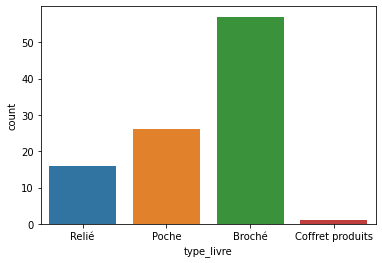

In [0]:
import seaborn as sns

sns.countplot(x='type_livre', data=df)


In [0]:
df['type_livre'].value_counts(normalize=1)

Out[100]: Broché              0.57
Poche               0.26
Relié               0.16
Coffret produits    0.01
Name: type_livre, dtype: float64

In [0]:
dummy_typeLIVRE = pd.get_dummies(df["type_livre"])
df = df.join(dummy_typeLIVRE)
df.head()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix,Broché,Coffret produits,Poche,Relié
0,1,Astérix - Astérix et le Griffon - n°39,René Goscinny,4.5,1375,Relié,9.99,0,0,0,1
1,2,One Piece - Édition originale - Tome 100,Eiichiro Oda,4.8,135,Poche,6.90,0,0,1,0
2,3,"Le Monde sans fin, miracle énergétique et déri...",Blain Christophe,4.8,118,Broché,27.00,1,0,0,0
3,4,La Clé de votre énergie: 22 protocoles pour vo...,Natacha Calestreme,4.6,2731,Broché,19.90,1,0,0,0
4,5,Organiseur familial Mémoniak 2021-2022,Editions 365,4.6,586,Broché,14.90,1,0,0,0


In [0]:
df.describe()

,rank_livre,note,nombre_votes,prix,Broché,Coffret produits,Poche,Relié
count,100.000000,99.000000,100.000000,100.000000,100.00000,100.00,100.000000,100.000000
mean,50.500000,4.616162,1824.640000,13.874897,0.57000,0.01,0.260000,0.160000
std,29.011492,0.229332,2183.881719,7.256511,0.49757,0.10,0.440844,0.368453
min,1.000000,3.700000,30.000000,2.950000,0.00000,0.00,0.000000,0.000000
25%,25.750000,4.500000,203.000000,6.990000,0.00000,0.00,0.000000,0.000000
50%,50.500000,4.700000,990.000000,11.950000,1.00000,0.00,0.000000,0.000000
75%,75.250000,4.800000,2766.750000,19.950001,1.00000,0.00,1.000000,0.000000
max,100.000000,5.000000,9417.000000,42.000000,1.00000,1.00,1.000000,1.000000


On voit que la médiane du nombre de votes se situe aux environs de 1000, on va privilégier les votes supérieurs à 1000 pour avoir une meilleure représentabilité.

In [0]:
data = df[df['nombre_votes'] >= 1000]
data = data.sort_values(['note'],axis=0, ascending=False)
data

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix,Broché,Coffret produits,Poche,Relié
65,66,"Naruto, tome 6",Masashi Kishimoto,4.9,1151,Poche,6.850000,0,0,1,0
51,52,"Naruto, tome 4",Masashi Kishimoto,4.8,1388,Poche,6.850000,0,0,1,0
69,70,Sami et Julie CP Niveau 1 Vive Noël,Laurence Lesbre,4.8,3731,Broché,2.950000,1,0,0,0
44,45,Le Petit Prince - Folio Junior,Antoine de Saint-Exupéry,4.8,8250,Poche,7.000000,0,0,1,0
43,44,One Piece - Édition originale - Tome 04: Attaq...,Eiichiro Oda,4.8,1080,Poche,6.900000,0,0,1,0
61,62,"Naruto, tome 5",Masashi Kishimoto,4.8,1370,Poche,6.850000,0,0,1,0
28,29,"Mortelle Adèle, Tome 01: Tout ça finira mal",M. TAN,4.8,3181,Broché,10.950000,1,0,0,0
27,28,One Piece - Édition originale - Tome 03: Une v...,Eiichiro Oda,4.8,1308,Broché,6.900000,1,0,0,0
68,69,"Mortelle Adèle, Tome 02: L'enfer, c'est les au...",M. TAN,4.8,2396,Broché,10.950000,1,0,0,0
24,25,One Piece - Édition originale - Tome 05: Pour ...,Eiichiro Oda,4.8,1019,Broché,6.900000,1,0,0,0


In [0]:
import plotly.express as px

data = df[df['nombre_votes'] >= 1000]
fig = px.scatter(data, y="nombre_votes", x="note", color="auteur", symbol="auteur")
fig.update_traces(marker_size=15)
fig.show()

On peut essayer de créer une variable de popularité à l'aide du nombre de votes en utilisant les valeurs associées aux quantiles qu'on a pu voir précédemment.

In [0]:
df.describe()

,rank_livre,note,nombre_votes,prix,Broché,Coffret produits,Poche,Relié
count,100.000000,99.000000,100.000000,100.000000,100.00000,100.00,100.000000,100.000000
mean,50.500000,4.616162,1824.640000,13.874897,0.57000,0.01,0.260000,0.160000
std,29.011492,0.229332,2183.881719,7.256511,0.49757,0.10,0.440844,0.368453
min,1.000000,3.700000,30.000000,2.950000,0.00000,0.00,0.000000,0.000000
25%,25.750000,4.500000,203.000000,6.990000,0.00000,0.00,0.000000,0.000000
50%,50.500000,4.700000,990.000000,11.950000,1.00000,0.00,0.000000,0.000000
75%,75.250000,4.800000,2766.750000,19.950001,1.00000,0.00,1.000000,0.000000
max,100.000000,5.000000,9417.000000,42.000000,1.00000,1.00,1.000000,1.000000


In [0]:
pop = pd.cut(x = df['nombre_votes'], 
                     labels = ['peu populaire', 'moyennement populaire', 'populaire', 'très populaire'], 
                     bins = [0, 243.75, 984.5, 2553.75, 9416])
print(pop)

0                 populaire
1             peu populaire
2             peu populaire
3            très populaire
4     moyennement populaire
              ...          
94                populaire
95           très populaire
96            peu populaire
97            peu populaire
98           très populaire
Name: nombre_votes, Length: 99, dtype: category
Categories (4, object): ['peu populaire' < 'moyennement populaire' < 'populaire' < 'très populaire']


In [0]:
pd.crosstab(df['note'], pop)

nombre_votes,peu populaire,moyennement populaire,populaire,très populaire
note,,,,
3.7,0,0,0,1
4.0,1,0,0,0
4.1,1,1,0,0
4.2,1,2,2,0
4.3,1,1,1,1
4.4,1,3,1,0
4.5,4,2,1,5
4.6,5,2,1,9
4.7,3,4,3,6


In [0]:
pd.crosstab(df['note'], pop, normalize=1)

nombre_votes,peu populaire,moyennement populaire,populaire,très populaire
note,,,,
3.7,0.000000,0.000000,0.000000,0.038462
4.0,0.035714,0.000000,0.000000,0.000000
4.1,0.035714,0.047619,0.000000,0.000000
4.2,0.035714,0.095238,0.086957,0.000000
4.3,0.035714,0.047619,0.043478,0.038462
4.4,0.035714,0.142857,0.043478,0.000000
4.5,0.142857,0.095238,0.043478,0.192308
4.6,0.178571,0.095238,0.043478,0.346154
4.7,0.107143,0.190476,0.130435,0.230769


In [0]:
pop = pd.get_dummies(pop)
print(pop)

    peu populaire  moyennement populaire  populaire  très populaire
0               0                      0          1               0
1               1                      0          0               0
2               1                      0          0               0
3               0                      0          0               1
4               0                      1          0               0
..            ...                    ...        ...             ...
94              0                      0          1               0
95              0                      0          0               1
96              1                      0          0               0
97              1                      0          0               0
98              0                      0          0               1

[99 rows x 4 columns]


In [0]:
# On utilise la fonction :  dataframe.join(variable(s))
df = df.join(pop) # ne pas oublier de l'inclure dans df pour actualiser le changement 
df.head()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix,Broché,Coffret produits,Poche,Relié,peu populaire,moyennement populaire,populaire,très populaire
0,1,Astérix - Astérix et le Griffon - n°39,René Goscinny,4.5,1375,Relié,9.99,0,0,0,1,0,0,1,0
1,2,One Piece - Édition originale - Tome 100,Eiichiro Oda,4.8,135,Poche,6.90,0,0,1,0,1,0,0,0
2,3,"Le Monde sans fin, miracle énergétique et déri...",Blain Christophe,4.8,118,Broché,27.00,1,0,0,0,1,0,0,0
3,4,La Clé de votre énergie: 22 protocoles pour vo...,Natacha Calestreme,4.6,2731,Broché,19.90,1,0,0,0,0,0,0,1
4,5,Organiseur familial Mémoniak 2021-2022,Editions 365,4.6,586,Broché,14.90,1,0,0,0,0,1,0,0


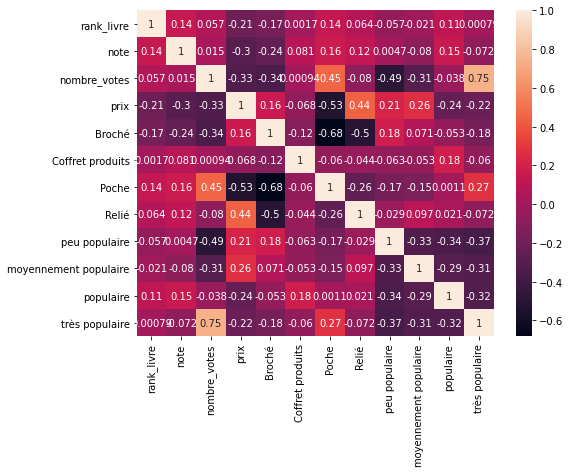

In [0]:
corr_df = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [0]:
rank_class = pd.cut(x = df['rank_livre'],
                  bins = [-1, 33, 66, 100],
                  labels = ['top_ranking', 'medium_ranking', 'bad_ranking'])

df['rank_class'] = rank_class

# on crée également la dummy

dummy_rankclass = pd.get_dummies(df['rank_class'])
df = df.join(dummy_rankclass)


In [0]:
rank_prix = pd.cut(x = df['prix'],
                  bins = [0, 8, 16, 1000],
                  labels = ['prix_faible', 'prix_moyen', 'prix_élevé'])

df['rank_prix'] = rank_prix

# et la dummy

dummy_rankprix = pd.get_dummies(df['rank_prix'])
df = df.join(dummy_rankprix)

In [0]:
df.head()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix,Broché,Coffret produits,Poche,...,populaire,très populaire,rank_class,top_ranking,medium_ranking,bad_ranking,rank_prix,prix_faible,prix_moyen,prix_élevé
0,1,Astérix - Astérix et le Griffon - n°39,René Goscinny,4.5,1369,Relié,9.99,0,0,0,...,1,0,top_ranking,1,0,0,prix_moyen,0,1,0
1,2,One Piece - Édition originale - Tome 100,Eiichiro Oda,4.8,134,Poche,6.90,0,0,1,...,0,0,top_ranking,1,0,0,prix_faible,1,0,0
2,3,"Le Monde sans fin, miracle énergétique et déri...",Blain Christophe,4.8,117,Broché,27.00,1,0,0,...,0,0,top_ranking,1,0,0,prix_élevé,0,0,1
3,4,La Clé de votre énergie: 22 protocoles pour vo...,Natacha Calestreme,4.6,2728,Broché,19.90,1,0,0,...,0,1,top_ranking,1,0,0,prix_élevé,0,0,1
4,5,Organiseur familial Mémoniak 2021-2022,Editions 365,4.6,586,Broché,14.90,1,0,0,...,0,0,top_ranking,1,0,0,prix_moyen,0,1,0


In [0]:
df.groupby('rank_prix')['prix'].mean()

Out[115]: rank_prix
prix_faible     6.670606
prix_moyen     12.072187
prix_élevé     22.315714
Name: prix, dtype: float32

Out[116]: <AxesSubplot:xlabel='type_livre', ylabel='prix'>

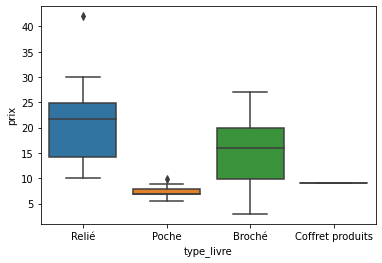

In [0]:
sns.boxplot(x='type_livre',y='prix',data=df)

On observe que les livres relié ont les prix les plus élevé. Les livres de poches sont très peu dispersés en terme de prix et peu cher par rapoort aux livres broché et reliés. Il existe n'y a qu'un seul qu'offret produit dans notre bdd donc il est difficile de conclure quant à cette catégorie.

Out[117]: <AxesSubplot:xlabel='type_livre', ylabel='note'>

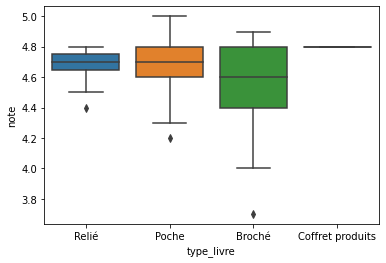

In [0]:
sns.boxplot(x='type_livre',y='note',data=df)

Les livres reliés et broché ont en moyenne de meilleurs notes que les livres de poche (4,7 contre 4,6). Les notes des livres reliés sont plus régulières (peu de dispersion autout de la moyenne) que les autres catégories.

Out[118]: <AxesSubplot:xlabel='note', ylabel='prix'>

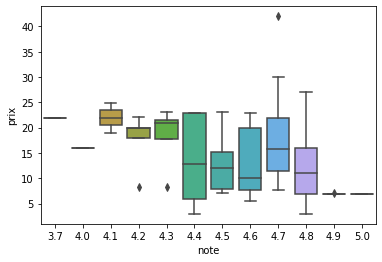

In [0]:
sns.boxplot(x='note',y='prix',data=df)

Out[119]: <AxesSubplot:xlabel='rank_class', ylabel='nombre_votes'>

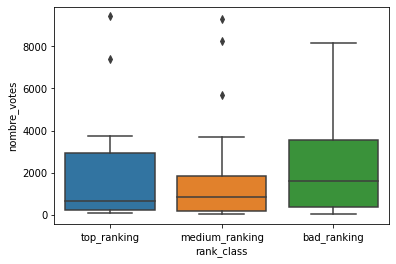

In [0]:
sns.boxplot(x='rank_class',y='nombre_votes',data=df)

On observe que le nombre de vote moyen est plus élevé pour les livres ayant un classement moyen que les autres catégories (meilleur et mauvais classement).

In [0]:
data = df.sort_values(["prix"], axis=0, ascending=False)
data

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix,Broché,Coffret produits,Poche,...,populaire,très populaire,rank_class,top_ranking,medium_ranking,bad_ranking,rank_prix,prix_faible,prix_moyen,prix_élevé
63,64,On va déguster l'Italie,François-Régis Gaudry,4.7,871,Relié,42.000000,0,0,0,...,0,0,medium_ranking,0,1,0,prix_élevé,0,0,1
54,55,Guinness World Records 2022,Guinness World Records,4.7,41,Relié,29.950001,0,0,0,...,0,0,medium_ranking,0,1,0,prix_élevé,0,0,1
2,3,"Le Monde sans fin, miracle énergétique et déri...",Blain Christophe,4.8,117,Broché,27.000000,1,0,0,...,0,0,top_ranking,1,0,0,prix_élevé,0,0,1
20,21,Anéantir,Michel Houellebecq,NaN,245,Relié,26.000000,0,0,0,...,0,0,top_ranking,1,0,0,prix_élevé,0,0,1
59,60,Les recettes enchantées Disney,Thibaud Villanova,4.7,2536,Relié,24.950001,0,0,0,...,1,0,medium_ranking,0,1,0,prix_élevé,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,La rivière à l'envers - 1er vol (01),Jean-Claude MOURLEVAT,4.6,2922,Broché,5.950000,1,0,0,...,0,1,bad_ranking,0,0,1,prix_faible,1,0,0
84,85,Saccage ce carnet PARTOUT !,Keri Smith,4.4,1595,Broché,5.900000,1,0,0,...,1,0,bad_ranking,0,0,1,prix_faible,1,0,0
78,79,Vendredi ou la vie sauvage,Michel Tournier,4.6,5072,Poche,5.600000,0,0,1,...,0,1,bad_ranking,0,0,1,prix_faible,1,0,0
88,89,Programme officiel LFI L'avenir en commun 2022,Jean-Luc Mélenchon,4.4,110,Broché,3.000000,1,0,0,...,0,0,bad_ranking,0,0,1,prix_faible,1,0,0


On peut essayer de voir s'il y a une corrélation entre le prix d'un livre et son nombre de ventes.

In [0]:
fig = px.line(df, x='rank_livre', y="prix")
fig.show()

Ou entre le prix et le rank :

In [0]:
data = df[df['rank_livre'] <= 10] # Le top 10
fig = px.bar(data, y="prix", x="rank_livre", color="auteur")
fig.show()

Ou bien encore sa note.

In [0]:
fig = px.line(df, x='rank_livre', y="note")
fig.show()

In [0]:
fig = px.line(df, x='rank_livre', y="nombre_votes")
fig.show()

Au niveau de la distribution du type de livre selon le rank :

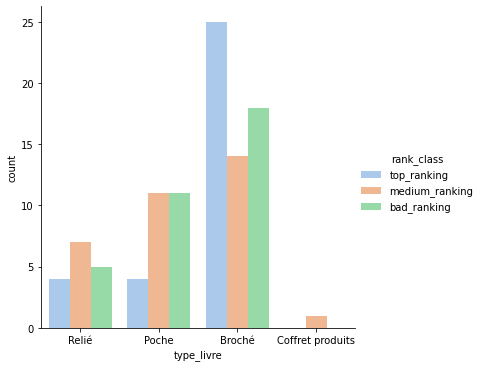

In [0]:
color = sns.color_palette("pastel")

ax = sns.catplot(x="type_livre", hue="rank_class",palette=color, data=df, kind='count')

In [0]:
df['rank_class'].value_counts()

Out[126]: bad_ranking       34
top_ranking       33
medium_ranking    33
Name: rank_class, dtype: int64

Nous voyons ici que livres brochés concentrent la majorité des livres se trouvant dans le top_ranking (premier tiers du classement Amazon) puisque l'on peut compter 25 livres broché dans le top_ranking ce qui représente 66% de l'effectif.

De plus, les livres de poches contiennent plus de 50% des livres les plus mal classés.

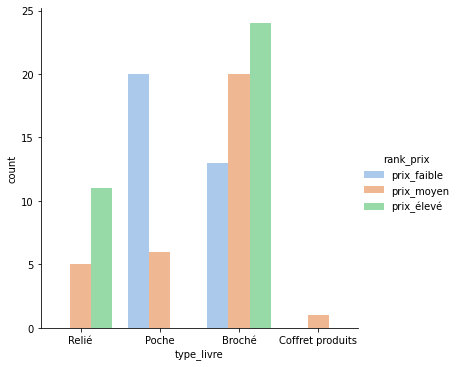

In [0]:
ax = sns.catplot(x="type_livre", hue="rank_prix",palette=color, data=df, kind='count')

Aucun livre de poche n'est classé dans la catégorie des livres les plus chers.

In [0]:
data = df
fig = px.scatter(data, y="note", x="rank_livre", color="rank_class", symbol="rank_class")
fig.update_traces(marker_size=15)
fig.show()

Il ne semble y avoir aucun lien entre le ranking et la note attribuée, on aurait pu s'attendre à avoir le top ranking dans le coin supérieur gauche, le medium au centre et le bad dans le coin droit mais non. Il y a même beaucoup plus de dispersion dans le haut du classement avec parmi les plus mauvaises notes

In [0]:
df['note'].mean()

Out[129]: 4.616162

In [0]:
data = df[df['rank_livre'] <= 50]
data['note'].mean()

Out[130]: 4.589796

In [0]:
data = df[df['rank_livre'] <= 25]
data['note'].mean()

Out[131]: 4.5625

In [0]:
data = df[df['rank_livre'] <= 10]
data['note'].mean()

Out[132]: 4.59

C'est même confirmé en effectuant les moyennes, à mesure que l'on progresse dans le classemment la note moyenne baisse.

## WordCloud

In [0]:
text = ""
for comment in df.titre_livre :
    text +=comment

In [0]:
data_top = df[df['rank_class']=='top_ranking']
data_medium = df[df['rank_class']=='medium_ranking']
data_bad = df[df['rank_class']=='bad_ranking']

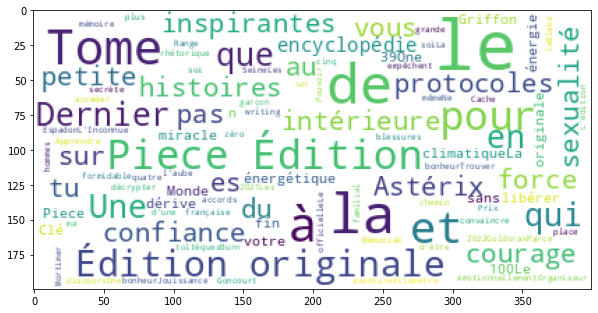

In [0]:
# nuage de mot des titres des livres les mieux classé
text_top = ""
for comment in data_top.titre_livre :
    text_top +=comment
    
wc = WordCloud(background_color="white", max_words=100, max_font_size=50, random_state=42)

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text_top)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

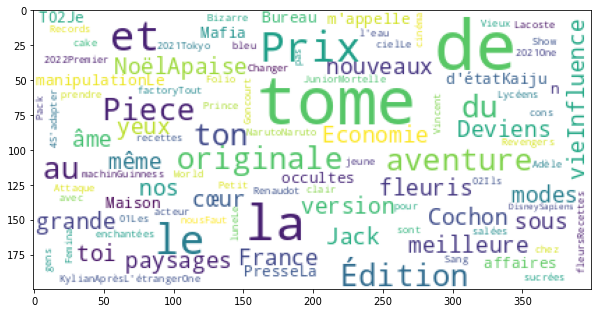

In [0]:
# nuage de mot des titres des livres moyennement bien classé

text_medium = ""
for comment in data_medium.titre_livre :
    text_medium +=comment
    
wc = WordCloud(background_color="white", max_words=100, max_font_size=50, random_state=42)

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text_medium)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

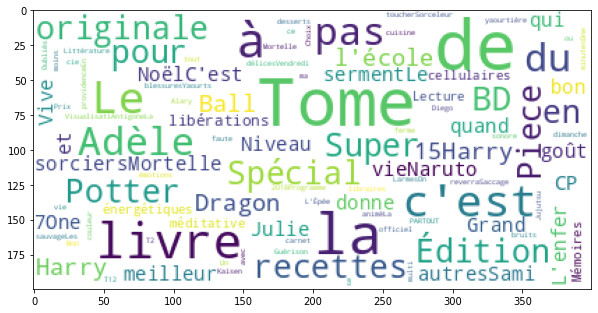

In [0]:
# nuage de mot des titres des livres les moins bien classé

text_bad = ""
for comment in data_bad.titre_livre :
    text_bad +=comment
    
wc = WordCloud(background_color="white", max_words=100, max_font_size=50, random_state=42)

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text_bad)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

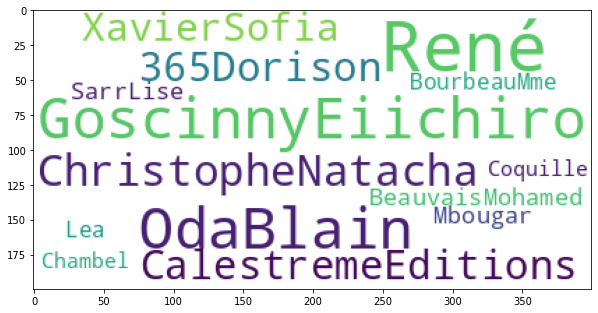

In [0]:
# nuage de mot des auteurs

author = ""
for comment in data.auteur :
    author +=comment
    
wc = WordCloud(background_color="white", max_words=100, max_font_size=50, random_state=42)

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(author)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Nous voyons que les auteurs les plus présent dans le classement s'affichent en grand : Eiichiro Oda, René Goscinny, Andrzej Sapkowski, M. TAN et Lisa Jewell.

## Machine-Learning

On va réaliser une simple régression pour vérifier à l'aide de la métrique du RMSE si l'on peut prédire le prix d'un livre de manière plus ou moins précise

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [0]:
df.head()

,rank_livre,titre_livre,auteur,note,nombre_votes,type_livre,prix,Broché,Coffret produits,Poche,...,populaire,très populaire,rank_class,top_ranking,medium_ranking,bad_ranking,rank_prix,prix_faible,prix_moyen,prix_élevé
0,1,Astérix - Astérix et le Griffon - n°39,René Goscinny,4.5,1375,Relié,9.99,0,0,0,...,1,0,top_ranking,1,0,0,prix_moyen,0,1,0
1,2,One Piece - Édition originale - Tome 100,Eiichiro Oda,4.8,135,Poche,6.90,0,0,1,...,0,0,top_ranking,1,0,0,prix_faible,1,0,0
2,3,"Le Monde sans fin, miracle énergétique et déri...",Blain Christophe,4.8,118,Broché,27.00,1,0,0,...,0,0,top_ranking,1,0,0,prix_élevé,0,0,1
3,4,La Clé de votre énergie: 22 protocoles pour vo...,Natacha Calestreme,4.6,2731,Broché,19.90,1,0,0,...,0,1,top_ranking,1,0,0,prix_élevé,0,0,1
4,5,Organiseur familial Mémoniak 2021-2022,Editions 365,4.6,586,Broché,14.90,1,0,0,...,0,0,top_ranking,1,0,0,prix_moyen,0,1,0


In [0]:
data = df.drop(['titre_livre', 'auteur', 'type_livre', 'prix', 'rank_class', 'rank_prix'], axis=1)
target = df['prix']

# Entraînement

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [0]:
print("Coefficients: \n", reg.coef_)
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
print("R2: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 3.98688842e-02  1.26138865e+00 -3.27768125e-05 -9.35044094e-01
  8.88178420e-16 -1.17103837e+00  2.10608246e+00  5.63490755e-01
  1.19055794e+00 -9.30907512e-01 -8.23141187e-01  1.92866770e+00
  3.82689969e-01 -2.31135767e+00 -6.33275420e+00 -1.34604124e+00
  7.67879544e+00]
RMSE: 2.67
R2: 0.81


Les résultats sont plutôt satisfaisant on a un R² de 0.81 il explique donc la variance globale du modèle à 81% et un RMSE de 2.67 ce qui veut dire que le modèle va retrouver à 2.67 euros près le prix du livre.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

On peut ensuite essayer un arbre de décision mais cette fois-ci en réalisant un tuning de paramètres pour obtenir le RMSE le plus bas possible.

In [0]:
parametres={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,100] }

grid_dt = model_selection.GridSearchCV(estimator=dt_reg, param_grid=parametres)
grille = grid_dt.fit(X_train,y_train)

In [0]:
print(grid_dt.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}


Les meilleurs paramètres sont donc ci-dessus on réalise la régression :

In [0]:
dt_reg = DecisionTreeRegressor(max_depth= 5, max_features= 'log2', max_leaf_nodes = 20, min_samples_leaf = 2, min_weight_fraction_leaf = 0.1, splitter = 'random')
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
print("R2: %.2f" % r2_score(y_test, y_pred))

RMSE: 2.64
R2: 0.81


On obtient une amélioration très minime de 2 centimes et aucun changement au niveau du R².

# Juste un essai pour voir si on peut générer une base de test

In [0]:
def scraptest(page): 
    url = f'https://www.amazon.fr/gp/bestsellers/books/301132/ref=zg_bs_pg_2?ie=UTF8&pg={page}' # On ajoute la variable page pour scraper chaque page avec une boucle
    r = requests.get(url)
    soup = bs(r.content, 'html.parser')
    return soup

In [0]:
pagetest_1 = scraptest(1)
pagetest_1

In [0]:
print(transform(pagetest_1))

#1
Un léger malentendu
Rose Mia
4,5 étoiles sur 5
1 187
Format Kindle
4,99 € 

#2
Un parfait inconnu
Riley Flowers
4,3 étoiles sur 5
173
Format Kindle
0,99 € 

#3
En pleine action
Lauren Landish
4,3 étoiles sur 5
392
Format Kindle
2,99 € 

#4
La plus secrète mémoire des hommes - Prix Goncourt 2021
Mohamed Mbougar Sarr
4,2 étoiles sur 5
483
Broché
22,00 € 

#5
L'Inconnue de la Seine
Guillaume Musso
3,7 étoiles sur 5
2 608
Broché
21,90 € 

#6
Les plus belles choses vivent à l'intérieur
Céline Fuentès
4,3 étoiles sur 5
1 384
Format Kindle
3,99 € 

#7
Pull moche recherche partenaire pour Noël (et plus si affinités) : une romance de Noël Enemies to Lovers !
Fanny Myjany
4,5 étoiles sur 5
556
Format Kindle
3,99 € 

#8
La Rêveuse d'Ostende
Eric-Emmanuel Schmitt
4,5 étoiles sur 5
181
Format Kindle
7,99 € 

#9
Kilomètre zéro : Le chemin du bonheur
Maud Ankaoua
4,6 étoiles sur 5
3 245
Poche
7,60 € 

#10
Anéantir
Michel Houellebecq
NaN
3 245
Relié
26,00 € 

#11
Pour rien au monde
Ken Follet
4,1 é

In [0]:
amazonlist = [] # C'est ici qu'on va stocker toutes les informations des pages
for page in range (1,3,1): # On considère seulement les 2 premières pages
    print(f'Extraction de la page: {page}') # On met un print pour vérifier que la boucle fonctionne bien
    c = scraptest(page) # On initialise à chaque fois la nouvelle page
    transform(c) # Et on effectue le scrapping

df_test = pd.DataFrame(amazonlist) # On crée un dataframe à partir de la liste qu'on a remplie
df_test.to_csv('amazon_datatest.csv', index=False, encoding = "UTF-8") # Et on l'exporte sous format CSV


Extraction de la page: 1
#1
Un léger malentendu
Rose Mia
4,5 étoiles sur 5
1 187
Format Kindle
4,99 € 

#2
Un parfait inconnu
Riley Flowers
4,3 étoiles sur 5
173
Format Kindle
0,99 € 

#3
En pleine action
Lauren Landish
4,3 étoiles sur 5
392
Format Kindle
2,99 € 

#4
La plus secrète mémoire des hommes - Prix Goncourt 2021
Mohamed Mbougar Sarr
4,2 étoiles sur 5
483
Broché
22,00 € 

#5
L'Inconnue de la Seine
Guillaume Musso
3,7 étoiles sur 5
2 608
Broché
21,90 € 

#6
Les plus belles choses vivent à l'intérieur
Céline Fuentès
4,3 étoiles sur 5
1 384
Format Kindle
3,99 € 

#7
Pull moche recherche partenaire pour Noël (et plus si affinités) : une romance de Noël Enemies to Lovers !
Fanny Myjany
4,5 étoiles sur 5
556
Format Kindle
3,99 € 

#8
La Rêveuse d'Ostende
Eric-Emmanuel Schmitt
4,5 étoiles sur 5
181
Format Kindle
7,99 € 

#9
Kilomètre zéro : Le chemin du bonheur
Maud Ankaoua
4,6 étoiles sur 5
3 245
Poche
7,60 € 

#10
Anéantir
Michel Houellebecq
NaN
3 245
Relié
26,00 € 

#11
Pour rien 

In [0]:
datasparktest=spark.createDataFrame(df_test)

In [0]:
def preprocessing(df):
    split_col = pyspark.sql.functions.split(df['note'], ' ')
    df = df.withColumn('note', split_col.getItem(0))

    split_col = pyspark.sql.functions.split(df['prix'], '€')
    df = df.withColumn('prix', split_col.getItem(0))
    df = df.withColumn('prix',rtrim('prix'))
    
    df = df.withColumn('note', regexp_replace('note', ',', '.').cast('float'))
    
    commaToDot = udf(lambda x : float(str(x).replace(',', '.')), FloatType())
    df=df.withColumn('prix',commaToDot(df.prix))
    
    df = df.withColumn('nombre_votes', regexp_replace('nombre_votes', '\u202f', '').cast('int'))
    
    df = df.withColumn('rank_livre', regexp_replace('rank_livre', '#', '').cast('int'))

    return df

def create_dummies(df):
    dummy_typeLIVRE = pd.get_dummies(df["type_livre"])
    df = df.join(dummy_typeLIVRE)
    
    pop = pd.cut(x = df['nombre_votes'], 
                     labels = ['peu populaire', 'moyennement populaire', 'populaire', 'très populaire'], 
                     bins = [0, 243.75, 984.5, 2553.75, 9416])
    pop = pd.get_dummies(pop)
    df = df.join(pop)
    
    rank_class = pd.cut(x = df['rank_livre'],
                  bins = [-1, 33, 66, 100],
                  labels = ['top_ranking', 'medium_ranking', 'bad_ranking'])
    df['rank_class'] = rank_class
    dummy_rankclass = pd.get_dummies(df['rank_class'])
    df = df.join(dummy_rankclass)
    
    rank_prix = pd.cut(x = df['prix'],
                  bins = [0, 8, 16, 1000],
                  labels = ['prix_faible', 'prix_moyen', 'prix_élevé'])
    df['rank_prix'] = rank_prix
    dummy_rankprix = pd.get_dummies(df['rank_prix'])
    df = df.join(dummy_rankprix)
    
    
    return df
    

In [0]:
datasparktest = preprocessing(datasparktest)
datasparktest.show()

+----------+--------------------+--------------------+----+------------+-------------+-----+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|   type_livre| prix|
+----------+--------------------+--------------------+----+------------+-------------+-----+
|         1| Un léger malentendu|            Rose Mia| 4.5|        1187|Format Kindle| 4.99|
|         2|  Un parfait inconnu|       Riley Flowers| 4.3|         173|Format Kindle| 0.99|
|         3|    En pleine action|      Lauren Landish| 4.3|         392|Format Kindle| 2.99|
|         4|La plus secrète m...|Mohamed Mbougar Sarr| 4.2|         483|       Broché| 22.0|
|         5|L'Inconnue de la ...|     Guillaume Musso| 3.7|        2608|       Broché| 21.9|
|         6|Les plus belles c...|      Céline Fuentès| 4.3|        1384|Format Kindle| 3.99|
|         7|Pull moche recher...|        Fanny Myjany| 4.5|         556|Format Kindle| 3.99|
|         8|La Rêveuse d'Ostende|Eric-Emmanuel Sch...| 4.5|         18

In [0]:
datasparktest.show()

+----------+--------------------+--------------------+----+------------+-------------+-----+
|rank_livre|         titre_livre|              auteur|note|nombre_votes|   type_livre| prix|
+----------+--------------------+--------------------+----+------------+-------------+-----+
|         1| Un léger malentendu|            Rose Mia| 4.5|        1187|Format Kindle| 4.99|
|         2|  Un parfait inconnu|       Riley Flowers| 4.3|         173|Format Kindle| 0.99|
|         3|    En pleine action|      Lauren Landish| 4.3|         392|Format Kindle| 2.99|
|         4|La plus secrète m...|Mohamed Mbougar Sarr| 4.2|         483|       Broché| 22.0|
|         5|L'Inconnue de la ...|     Guillaume Musso| 3.7|        2608|       Broché| 21.9|
|         6|Les plus belles c...|      Céline Fuentès| 4.3|        1384|Format Kindle| 3.99|
|         7|Pull moche recher...|        Fanny Myjany| 4.5|         556|Format Kindle| 3.99|
|         8|La Rêveuse d'Ostende|Eric-Emmanuel Sch...| 4.5|         18